Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/tmp/ipython-input-1294113413.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Hour', palette='viridis');


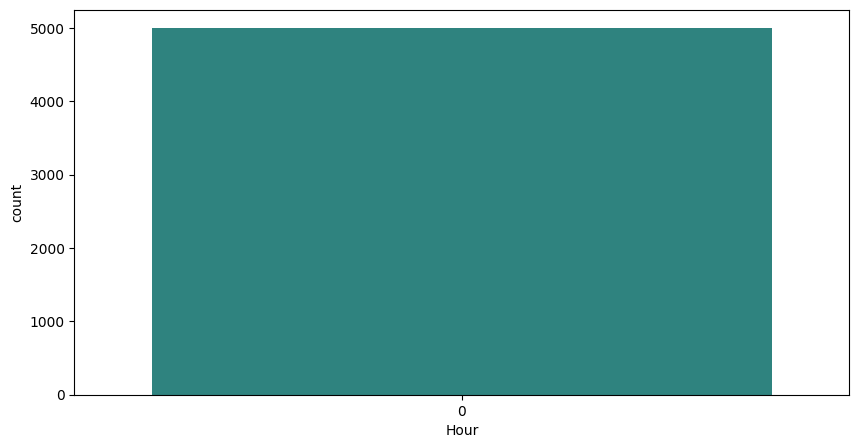

/tmp/ipython-input-1294113413.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='DayOfWeek', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='coolwarm');


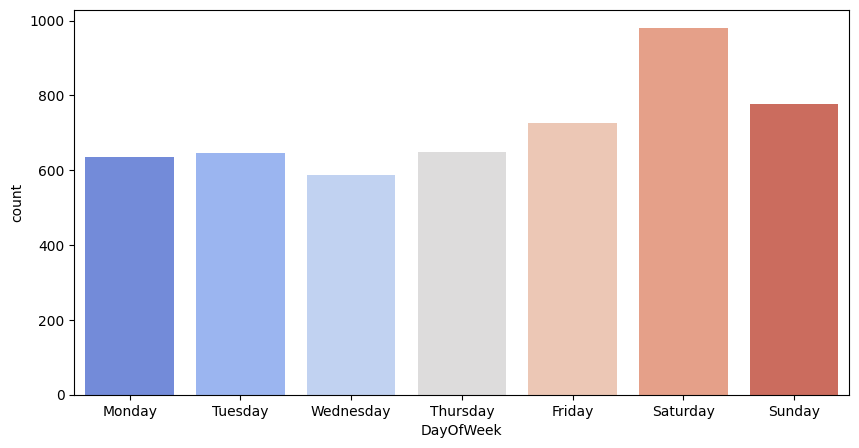

/tmp/ipython-input-1294113413.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Roadway', order=df_cleaned['Roadway'].value_counts().index, palette='magma');


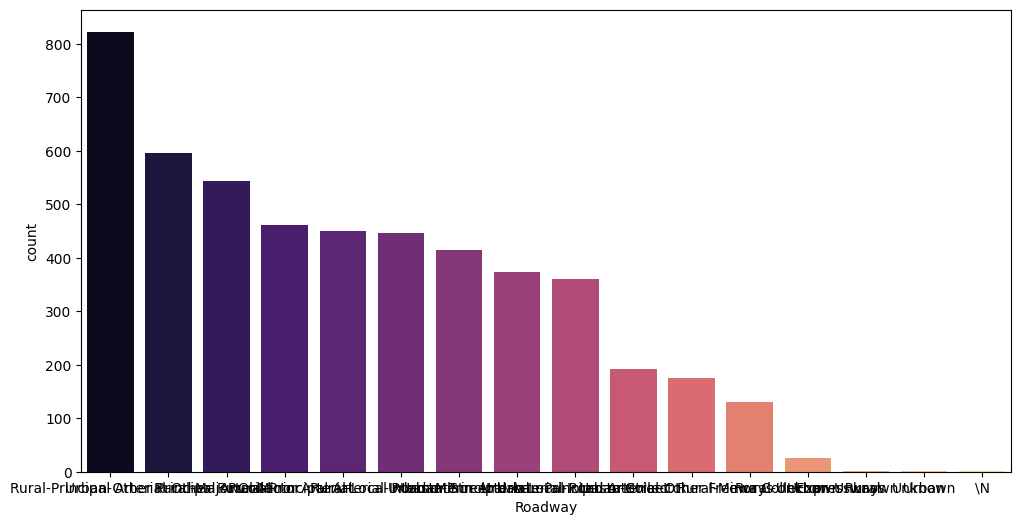

/tmp/ipython-input-1294113413.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Atmospheric Condition', order=df_cleaned['Atmospheric Condition'].value_counts().index, palette='cool');


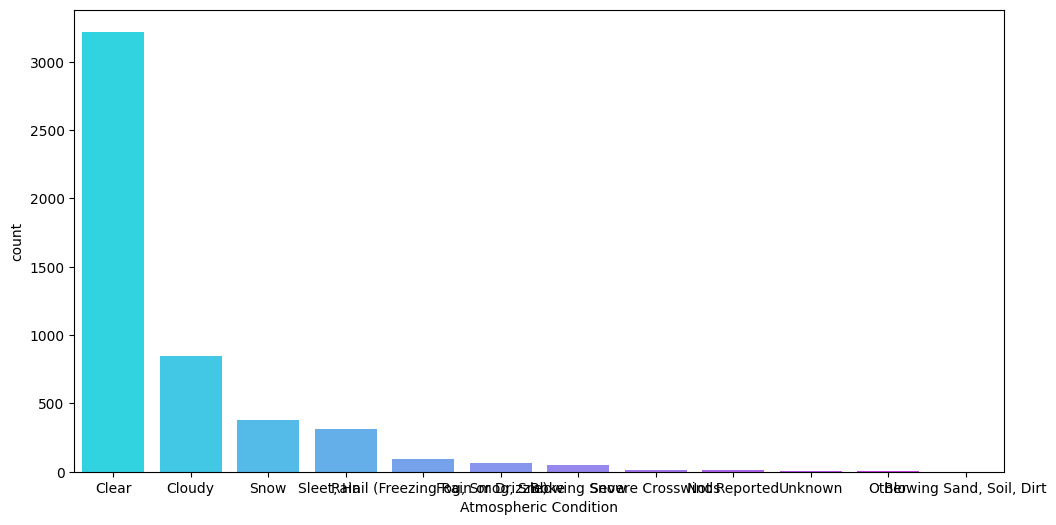

/tmp/ipython-input-1294113413.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Rush_Hour', palette='coolwarm')


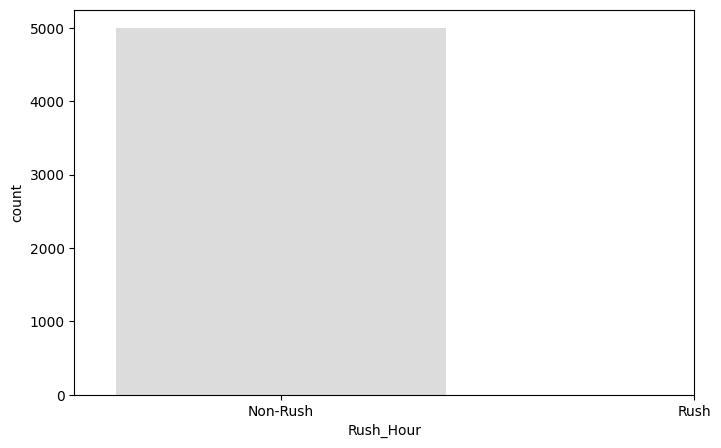

/tmp/ipython-input-1294113413.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='State', order=df_cleaned['State'].value_counts().index, palette='viridis');


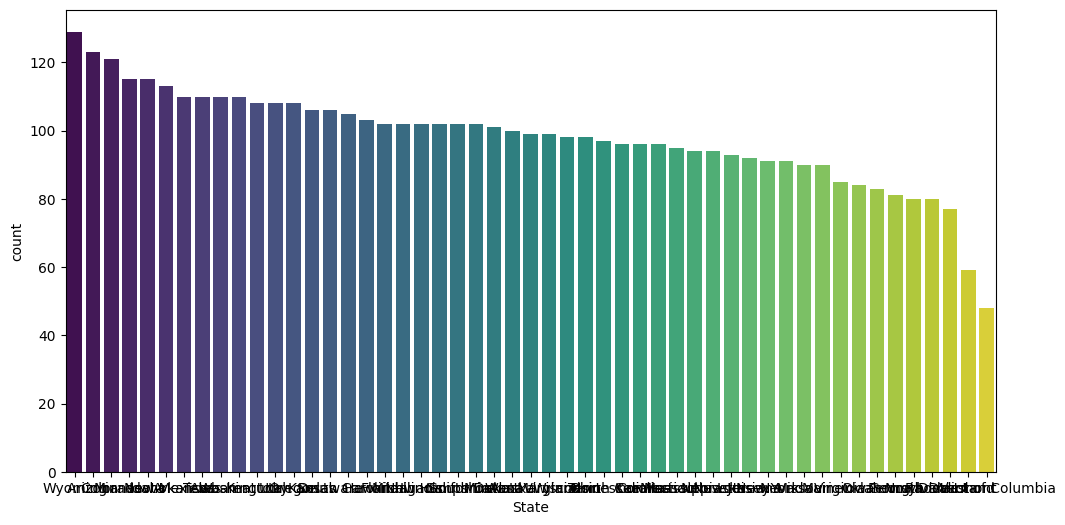

/tmp/ipython-input-1294113413.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cleaned, x='State', y='Fatalities in crash', estimator=sum, palette='magma');


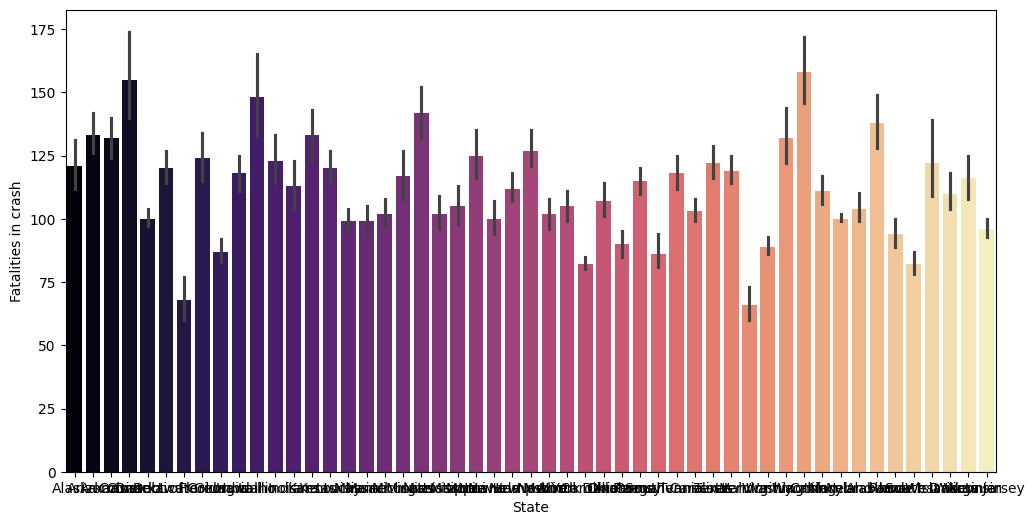

/tmp/ipython-input-1294113413.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cleaned, x='Roadway', y='Fatalities in crash', estimator=sum, palette='rocket');


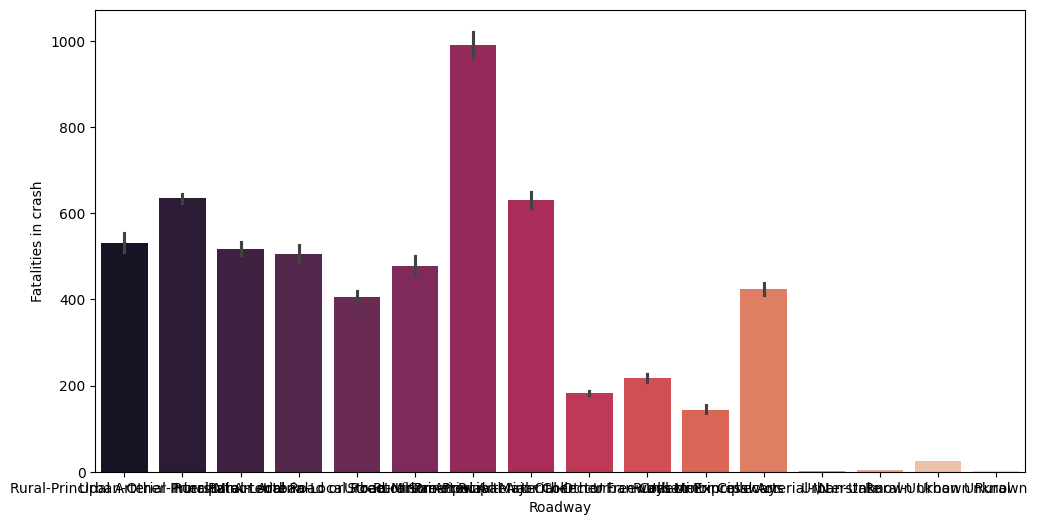

/tmp/ipython-input-1294113413.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_cleaned, x='Atmospheric Condition', y='Fatalities in crash', estimator=sum, palette='viridis');


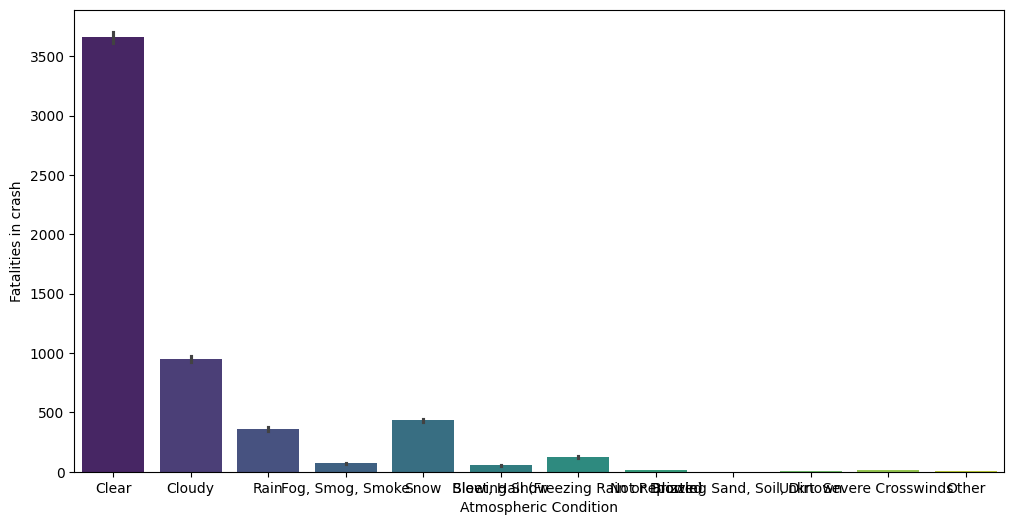

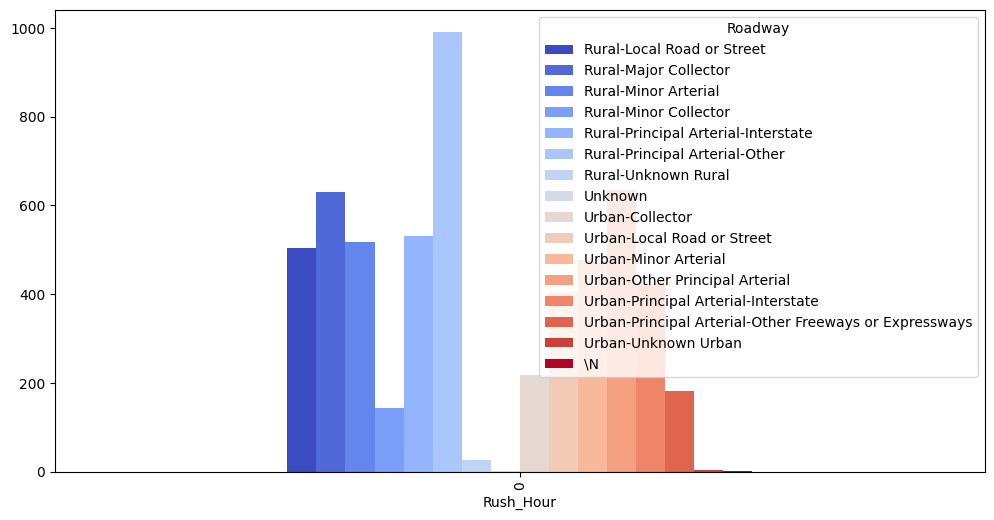

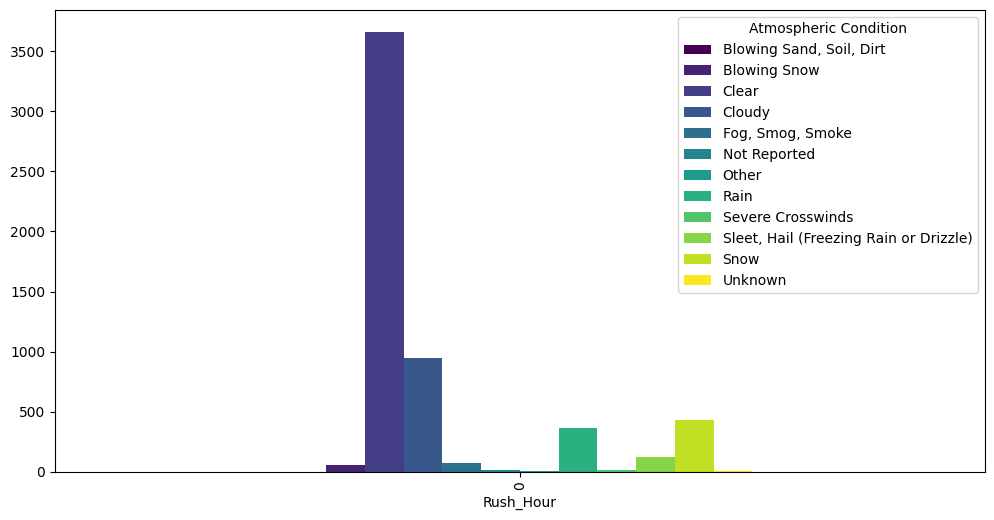

In [8]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = '/content/drive/My Drive/US_Accidents_2011.csv'
df = pd.read_csv(file_path)

df_cleaned = df.dropna(subset=['State','Atmospheric Condition','Roadway','Crash Date'])
df_cleaned['Crash_Date'] = pd.to_datetime(df_cleaned['Crash Date'])
df_cleaned['Hour'] = df_cleaned['Crash_Date'].dt.hour
df_cleaned['DayOfWeek'] = df_cleaned['Crash_Date'].dt.day_name()
df_cleaned['Month'] = df_cleaned['Crash_Date'].dt.month
df_cleaned['Rush_Hour'] = df_cleaned['Hour'].apply(lambda x: 1 if (7<=x<=9) or (16<=x<=18) else 0)

plt.figure(figsize=(10,5))
sns.countplot(data=df_cleaned, x='Hour', palette='viridis');
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=df_cleaned, x='DayOfWeek', order=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'], palette='coolwarm');
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=df_cleaned, x='Roadway', order=df_cleaned['Roadway'].value_counts().index, palette='magma');
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=df_cleaned, x='Atmospheric Condition', order=df_cleaned['Atmospheric Condition'].value_counts().index, palette='cool');
plt.show()

plt.figure(figsize=(8,5))
sns.countplot(data=df_cleaned, x='Rush_Hour', palette='coolwarm')
plt.xticks([0,1], ['Non-Rush','Rush']);
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=df_cleaned, x='State', order=df_cleaned['State'].value_counts().index, palette='viridis');
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=df_cleaned, x='State', y='Fatalities in crash', estimator=sum, palette='magma');
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=df_cleaned, x='Roadway', y='Fatalities in crash', estimator=sum, palette='rocket');
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=df_cleaned, x='Atmospheric Condition', y='Fatalities in crash', estimator=sum, palette='viridis');
plt.show()

rush_summary = df_cleaned.groupby(['Rush_Hour','Roadway'])['Fatalities in crash'].sum().unstack()
rush_summary.plot(kind='bar', figsize=(12,6), colormap='coolwarm');
plt.show()

rush_weather = df_cleaned.groupby(['Rush_Hour','Atmospheric Condition'])['Fatalities in crash'].sum().unstack()
rush_weather.plot(kind='bar', figsize=(12,6), colormap='viridis');
plt.show()
